<a href="https://colab.research.google.com/github/ElwinGao4444/colab/blob/main/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow介绍

官方教程：https://www.tensorflow.org/tutorials

官方指南：https://www.tensorflow.org/guide

官方API文档：https://www.tensorflow.org/api_docs/python/tf

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Tensorflow基础

## 张量

张量在使用上和numpy的用法非常相似，可以相互借鉴学习

### 初始化

#### 直接初始化

In [3]:
print('标量：', tf.constant(0))
print('秩为1的张量（向量）：', tf.constant([1,2,3]))
print('秩为2的张量（矩阵）：', tf.reshape(tf.range(0,4,1), [2,2]))

标量： tf.Tensor(0, shape=(), dtype=int32)
秩为1的张量（向量）： tf.Tensor([1 2 3], shape=(3,), dtype=int32)
秩为2的张量（矩阵）： tf.Tensor(
[[0 1]
 [2 3]], shape=(2, 2), dtype=int32)


#### 结构初始化

In [4]:
print('全0/1初始化（标量）：', tf.zeros([]), tf.ones([]))
print('全0/1初始化（向量）：', tf.zeros([5]), tf.ones([5]))
print('全0/1初始化（矩阵）：', tf.zeros([2,2]), tf.ones([2,2]))
arr = np.arange(8).reshape(2,2,2)
print('全0/1初始化（like）：', tf.zeros_like(arr), tf.ones_like(arr))  # 这里用list，ndarray，tensor都可以

print('填充指定值：', tf.fill([2,2],9))

全0/1初始化（标量）： tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
全0/1初始化（向量）： tf.Tensor([0. 0. 0. 0. 0.], shape=(5,), dtype=float32) tf.Tensor([1. 1. 1. 1. 1.], shape=(5,), dtype=float32)
全0/1初始化（矩阵）： tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
全0/1初始化（like）： tf.Tensor(
[[[0 0]
  [0 0]]

 [[0 0]
  [0 0]]], shape=(2, 2, 2), dtype=int64) tf.Tensor(
[[[1 1]
  [1 1]]

 [[1 1]
  [1 1]]], shape=(2, 2, 2), dtype=int64)
填充指定值： tf.Tensor(
[[9 9]
 [9 9]], shape=(2, 2), dtype=int32)


#### 随机初始化

In [5]:
print('使用均匀分布采用的随机初始化：', tf.random.uniform([2, 2], minval=0, maxval=100))
print('使用高斯分布采用的随机初始化：', tf.random.normal([2, 2], mean=0, stddev=1))

使用均匀分布采用的随机初始化： tf.Tensor(
[[87.480354  7.753718]
 [25.178814 58.403385]], shape=(2, 2), dtype=float32)
使用高斯分布采用的随机初始化： tf.Tensor(
[[ 1.3672357  -0.33339462]
 [ 0.4449688   1.0676976 ]], shape=(2, 2), dtype=float32)


### 类型转换

In [6]:
print('ndarray转tensor：', tf.convert_to_tensor(np.arange(3)))
print('tensor转ndarray：', np.array(tf.constant([1,2,3])))
print('tensor转ndarray：', tf.constant([1,2,3]).numpy())

ndarray转tensor： tf.Tensor([0 1 2], shape=(3,), dtype=int64)
tensor转ndarray： [1 2 3]
tensor转ndarray： [1 2 3]


In [7]:
np.arange(8).reshape(2,2,2)

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

### 张量运算

In [8]:
a = tf.constant([[1,2],[3,4]], dtype=tf.double)
b = tf.constant([[2,4],[6,8]], dtype=tf.double)

print('加法运算：', tf.add(a, b))
print('逐项相乘：', tf.multiply(a, b))
print('矩阵乘法：', tf.matmul(a, b))

print('加法运算：', a + b)
print('逐项相乘：', a * b)
print('矩阵乘法：', a @ b)

print('寻找张量中最大的元素', tf.reduce_max(a))
print('寻找张量中最大的元素位置', tf.math.argmax(a))
print('计算SoftMax', tf.nn.softmax(a))

加法运算： tf.Tensor(
[[ 3.  6.]
 [ 9. 12.]], shape=(2, 2), dtype=float64)
逐项相乘： tf.Tensor(
[[ 2.  8.]
 [18. 32.]], shape=(2, 2), dtype=float64)
矩阵乘法： tf.Tensor(
[[14. 20.]
 [30. 44.]], shape=(2, 2), dtype=float64)
加法运算： tf.Tensor(
[[ 3.  6.]
 [ 9. 12.]], shape=(2, 2), dtype=float64)
逐项相乘： tf.Tensor(
[[ 2.  8.]
 [18. 32.]], shape=(2, 2), dtype=float64)
矩阵乘法： tf.Tensor(
[[14. 20.]
 [30. 44.]], shape=(2, 2), dtype=float64)
寻找张量中最大的元素 tf.Tensor(4.0, shape=(), dtype=float64)
寻找张量中最大的元素位置 tf.Tensor([1 1], shape=(2,), dtype=int64)
计算SoftMax tf.Tensor(
[[0.26894142 0.73105858]
 [0.26894142 0.73105858]], shape=(2, 2), dtype=float64)


### 形状操作

In [9]:
print('修改形状：', tf.reshape([[1],[2],[3]], [1, -1]))
print('展平张量：', tf.reshape([[1],[2],[3]], [-1]))

修改形状： tf.Tensor([[1 2 3]], shape=(1, 3), dtype=int32)
展平张量： tf.Tensor([1 2 3], shape=(3,), dtype=int32)


### 类型转换

In [10]:
the_f64_tensor = tf.constant([2.2, 3.3, 4.4], dtype=tf.float64)
print('float64类型：', the_f64_tensor)
the_f16_tensor = tf.cast(the_f64_tensor, dtype=tf.float16)
print('float16类型：', the_f16_tensor)

float64类型： tf.Tensor([2.2 3.3 4.4], shape=(3,), dtype=float64)
float16类型： tf.Tensor([2.2 3.3 4.4], shape=(3,), dtype=float16)


### 不规则张量

In [11]:
# 不规则张量不能直接构建
ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9]]
try:
  tensor = tf.constant(ragged_list)
except Exception as e:
  print(f"{type(e).__name__}: {e}")

# 不规则张量需要使用：tf.ragged.RaggedTensor进行构建
print('构建不规则张量：', tf.ragged.constant(ragged_list))

ValueError: Can't convert non-rectangular Python sequence to Tensor.
构建不规则张量： <tf.RaggedTensor [[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]>


### 字符串张量
（官方文档：https://www.tensorflow.org/api_docs/python/tf/strings）

In [12]:
print('构建字符串标量：', tf.constant("Gray wolf"))
print('构建字符串向量：', tf.constant(["Gray wolf","Quick brown fox","Lazy dog"]))

构建字符串标量： tf.Tensor(b'Gray wolf', shape=(), dtype=string)
构建字符串向量： tf.Tensor([b'Gray wolf' b'Quick brown fox' b'Lazy dog'], shape=(3,), dtype=string)


### 稀疏张量

In [13]:
# 构建在[0,0]和[1,2]两个位置，值为1和2的，3行4列的稀疏矩阵
print('构建稀疏张量：', tf.sparse.SparseTensor(indices=[[0, 0], [1, 2]], values=[1, 2], dense_shape=[3, 4]))

构建稀疏张量： SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 2], shape=(2,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


## 变量
张量是只读的，变量是可变的

### 变量与张量
大部分张量的操作，都可以用于变量

In [14]:
print('使用list初始化变量：', tf.Variable([1,2,3]))
print('使用ndarray初始化变量：', tf.Variable(np.arange(10)))
print('使用tensor初始化变量：', tf.Variable(tf.constant(0)))
# tf.reshape(tf.Variable([1,2,3]), [1,4]) # Variable是无法reshape的

使用list初始化变量： <tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3], dtype=int32)>
使用ndarray初始化变量： <tf.Variable 'Variable:0' shape=(10,) dtype=int64, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>
使用tensor初始化变量： <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0>


### 变量的赋值

In [15]:
v = tf.Variable([2.0, 3.0])
print('对变量进行赋值：', v.assign([1, 2]))
try:
  v.assign([1.0, 2.0, 3.0]) # 变量
except Exception as e:
  print(f"{type(e).__name__}: {e}")

对变量进行赋值： <tf.Variable 'UnreadVariable' shape=(2,) dtype=float32, numpy=array([1., 2.], dtype=float32)>
ValueError: Cannot assign value to variable ' Variable:0': Shape mismatch.The variable shape (2,), and the assigned value shape (3,) are incompatible.


### 变量的复制

In [16]:
# 用一个变量初始化另一个变量，会进行变量的复制
a = tf.Variable([2.0, 3.0])
b = tf.Variable(a)

a.assign([5, 6])
# 复制对象产生新的存储空间，不与原变量共享空间
print(a.numpy())
print(b.numpy())

[5. 6.]
[2. 3.]


### 变量的运算

In [17]:
print(a.assign_add([2,3]).numpy())  # [7. 9.]
print(a.assign_sub([7,9]).numpy())  # [0. 0.]

[7. 9.]
[0. 0.]


### 命名与监视

In [18]:
print('通过对变量进行命名，方便调试：', tf.Variable([0], name="Mark"))
print('通过设置trainable打开/关闭梯度计算', tf.Variable(1, trainable=False))

通过对变量进行命名，方便调试： <tf.Variable 'Mark:0' shape=(1,) dtype=int32, numpy=array([0], dtype=int32)>
通过设置trainable打开/关闭梯度计算 <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=1>


### 指定运算设备

In [19]:
# 由于 tf.config.set_soft_device_placement 默认处于打开状态，所以，即使在没有 GPU 的设备上运行此代码，它也会运行，只不过乘法步骤会在 CPU 上执行
with tf.device('CPU:0'):
  a = tf.Variable([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.Variable([[1.0, 2.0, 3.0]])

with tf.device('GPU:0'):
  # Element-wise multiply
  k = a * b

print(k)

tf.Tensor(
[[ 1.  4.  9.]
 [ 4. 10. 18.]], shape=(2, 3), dtype=float32)


## 自动微分
（官方文档：https://www.tensorflow.org/guide/autodiff）

### 计算梯度

#### 标量的梯度

In [20]:
# 一元方程的梯度，其实就是导数
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
  y = x**2

dy_dx = tape.gradient(y, x) # 计算y对x的导数
dy_dx.numpy()

6.0

#### 张量的梯度

In [21]:
w = tf.Variable(tf.random.normal((3, 2)), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]

with tf.GradientTape(persistent=True) as tape:
  y = x @ w + b
  loss = tf.reduce_mean(y**2)

[dl_dw, dl_db] = tape.gradient(loss, [w, b])  # 计算loss函数对[w,b]的梯度

dl_dw, dl_db

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[ 1.9597007, -0.7849556],
        [ 3.9194014, -1.5699112],
        [ 5.879102 , -2.354867 ]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 1.9597007, -0.7849556], dtype=float32)>)

In [22]:
w = tf.Variable(tf.random.normal((3, 2)), name='w')         # 每列代表一组参数集合，逻辑上对应的是一个"感知机"
b = tf.Variable(tf.zeros(1, dtype=tf.float32), name='b')    # b只有1行1列，但是实际运算时，会通过广播机制扩展为1行2列
x = [[1., 2., 3.]]

with tf.GradientTape(persistent=True) as tape:
  y = x @ w + b # @表示矩阵乘法运算
  loss = tf.reduce_mean(y**2)

[dl_dw, dl_db] = tape.gradient(loss, [w, b])  # 计算loss函数对[w,b]的梯度

dl_dw, dl_db

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[ 5.065355 , -2.9760623],
        [10.13071  , -5.9521246],
        [15.196064 , -8.928186 ]], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.0892925], dtype=float32)>)

### 相对于模型的梯度

In [23]:
# 通常将 tf.Variables 收集到 tf.Module 或其子类之一（layers.Layer、keras.Model）中，用于设置检查点和导出。
layer = tf.keras.layers.Dense(2, activation='relu')     # 构建一个层，包含2个感知机
x = tf.constant([[1., 2., 3.]])

with tf.GradientTape() as tape:
    # Forward pass
    y = layer(x)
    loss = tf.reduce_mean(y**2)
grad = tape.gradient(loss, layer.trainable_variables)

for var, g in zip(layer.trainable_variables, grad):
    print(f'{var.name}, shape: {g.shape}')

dense/kernel:0, shape: (3, 2)
dense/bias:0, shape: (2,)


### 控制梯度带监视的内容

In [24]:
# 默认情况下 tf.Tensor 无法被“监视”，并且 tf.Variable如果设置trainable=False，也不可被训练

# A trainable variable
x0 = tf.Variable(3.0, name='x0')
# Not trainable
x1 = tf.Variable(3.0, name='x1', trainable=False)
# Not a Variable: A variable + tensor returns a tensor.
x2 = tf.Variable(2.0, name='x2') + 1.0
# Not a variable
x3 = tf.constant(3.0, name='x3')

with tf.GradientTape() as tape:
  y = (x0**2) + (x1**2) + (x2**2) + (x3**2)

grad = tape.gradient(y, [x0, x1, x2, x3])

for g in grad:
  print(g)

[var.name for var in tape.watched_variables()]

tf.Tensor(6.0, shape=(), dtype=float32)
None
None
None


['x0:0']

In [25]:
# 通过watch方法，来监视原本无法监视的数据
x = tf.constant(3.0)
with tf.GradientTape() as tape:
  tape.watch(x)
  y = x**2

# dy = 2x * dx
dy_dx = tape.gradient(y, x)
print(dy_dx.numpy())

6.0


In [26]:
# 通过设置watch_accessed_variables=False，停用所有默认监视的行为
x0 = tf.Variable(0.0)
x1 = tf.Variable(10.0)

with tf.GradientTape(watch_accessed_variables=False) as tape:
  tape.watch(x1)
  y0 = tf.math.sin(x0)
  y1 = tf.nn.softplus(x1)
  y = y0 + y1
  ys = tf.reduce_sum(y)

# dys/dx1 = exp(x1) / (1 + exp(x1)) = sigmoid(x1)
grad = tape.gradient(ys, {'x0': x0, 'x1': x1})

print('dy/dx0:', grad['x0'])
print('dy/dx1:', grad['x1'].numpy())

dy/dx0: None
dy/dx1: 0.9999546


### 中间结果

In [27]:
x = tf.constant(3.0)

with tf.GradientTape() as tape:
  tape.watch(x)
  y = x * x
  z = y * y

# Use the tape to compute the gradient of z with respect to the
# intermediate value y.
# dz_dy = 2 * y and y = x ** 2 = 9
print(tape.gradient(z, y).numpy())

18.0


In [28]:
# 默认情况下，只要调用 GradientTape.gradient 方法，就会释放 GradientTape 保存的资源。
# 要在同一计算中计算多个梯度，需要使用persistent=True参数。
x = tf.constant([1, 3.0])
with tf.GradientTape(persistent=True) as tape:
  tape.watch(x)
  y = x * x
  z = y * y

print(tape.gradient(z, x).numpy())  # [4.0, 108.0] (4 * x**3 at x = [1.0, 3.0])
print(tape.gradient(y, x).numpy())  # [2.0, 6.0] (2 * x at x = [1.0, 3.0])

[  4. 108.]
[2. 6.]


### 非标量目标的梯度

In [29]:
# 如果需要多个目标的梯度，则最终结果等于每个目标的梯度总和
x = tf.Variable(2.0)
with tf.GradientTape(persistent=True) as tape:
  y0 = x**2
  y1 = 1 / x

print(tape.gradient(y0, x).numpy())
print(tape.gradient(y1, x).numpy())
print(tape.gradient({'y0': y0, 'y1': y1}, x).numpy())

4.0
-0.25
3.75


In [30]:
# 如果目标不是标量，则计算总和的梯度
x = tf.Variable(2.)

with tf.GradientTape() as tape:
  y = x * [3., 4.]

print(tape.gradient(y, x).numpy())

7.0


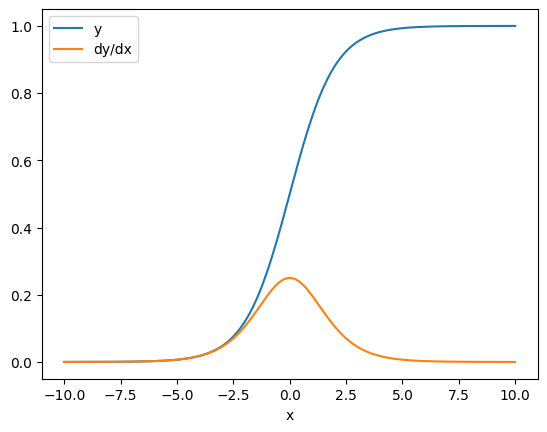

In [31]:
# 向量的梯度还是向量
x = tf.linspace(-10.0, 10.0, 200+1)
with tf.GradientTape() as tape:
  tape.watch(x)
  y = tf.nn.sigmoid(x)

dy_dx = tape.gradient(y, x)

plt.plot(x, y, label='y')
plt.plot(x, dy_dx, label='dy/dx')
plt.legend()
_ = plt.xlabel('x')

### 控制流

In [32]:
# 在执行运算时，会自然地处理 Python 控制流（例如 if 和 while 语句）

x = tf.constant(1.0)

v0 = tf.Variable(2.0)
v1 = tf.Variable(2.0)

with tf.GradientTape(persistent=True) as tape:
  tape.watch(x)
  if x > 0.0:
    result = v0
  else:
    result = v1**2

dv0, dv1 = tape.gradient(result, [v0, v1])

print(dv0)
print(dv1)

tf.Tensor(1.0, shape=(), dtype=float32)
None


### gradient 返回 None 的情况

#### 使用张量替换变量

In [33]:
# Variable不能用=进行赋值操作
x = tf.Variable(2.0)

for epoch in range(2):
  with tf.GradientTape() as tape:
    y = x+1

  print(type(x).__name__, ":", tape.gradient(y, x))
  x = x + 1   # This should be `x.assign_add(1)`

ResourceVariable : tf.Tensor(1.0, shape=(), dtype=float32)
EagerTensor : None


#### 在 TensorFlow 之外进行了计算

In [34]:
# 不能再GradientTape中用其他库函数进行运算

x = tf.Variable([[1.0, 2.0],
                 [3.0, 4.0]], dtype=tf.float32)

with tf.GradientTape() as tape:
  x2 = x**2

  # This step is calculated with NumPy
  y = np.mean(x2, axis=0)

  # Like most ops, reduce_mean will cast the NumPy array to a constant tensor
  # using `tf.convert_to_tensor`.
  y = tf.reduce_mean(y, axis=0)

print(tape.gradient(y, x))

None


#### 通过整数或字符串获取梯度

In [35]:
# 整数和字符串不可微分

x = tf.constant(10)

with tf.GradientTape() as g:
  g.watch(x)
  y = x * x

print(g.gradient(y, x))

None


#### 通过有状态对象获取梯度

In [36]:
# 这个地方不是很懂，感觉就是在GradientTape中的Varuable不能使用assign
x0 = tf.Variable(3.0)
x1 = tf.Variable(0.0)

with tf.GradientTape() as tape:
  # Update x1 = x1 + x0.
  x1.assign_add(x0)
  # The tape starts recording from x1.
  y = x1**2   # y = (x1 + x0)**2

# This doesn't work.
print(tape.gradient(y, x0))   #dy/dx0 = 2*(x1 + x0)

None


### 未注册梯度

In [50]:
# 并非所有Operation都可以计算梯度
# tf.raw_ops 显示了哪些低级运算已经注册梯度
tf.raw_ops

<module 'tensorflow._api.v2.raw_ops' from '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/raw_ops/__init__.py'>

## 计算图和 tf.function 简介


# Keras

## Sequential模型

### 一个最简单的模型

In [38]:
# model可以直接作为函数使用
# 当如此使用的时候，它就是在求解Sequential所代表的复合函数
# 对于一个输出长度为1的Dense层来说，它所表达的就是求解多元线性函数
model = tf.keras.Sequential() # 定义一个Sequential模型
model.add(tf.keras.layers.Dense(1,  # 输出向量长度为1的线性函数
                kernel_initializer=tf.keras.initializers.Ones(),  # w系数初始化为全1
                bias_initializer=tf.keras.initializers.Ones(),   # b系数初始化为1
                ))  # Dense层在被首次使用的时候，会动态适配输入参数的元数
model(tf.constant([[1]])) # 1个样本，每个样本元数为1，也就是最常见的y=wx+b

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[2.]], dtype=float32)>

## 简单的训练模型

In [39]:
# 加载数据集
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [40]:
# 定义模型

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

# 模型(model)可以简单的理解为一个复合函数，参数就是自变量(向量)集合，返回值就是对应的y值集合
predictions = model(x_train[:1])    # 输入位1个28x28的数据，输出为1个size为10的一维向量
tf.nn.softmax(predictions).numpy()  # 将model输出的向量，进行softmax操作，转化为相加为1的概率

array([[0.13130797, 0.06175844, 0.05405818, 0.04427799, 0.0945149 ,
        0.12471174, 0.1831107 , 0.10094436, 0.06601766, 0.13929805]],
      dtype=float32)

In [41]:
# 不在model里增加一个softmax层，而是使用SparseCategoricalCrossentropy的from_logits参数
# 主要原因就是softmax做指数运算，交叉熵做对数运算，二者合并运算，可以简化计算，并防止数值越界
# 自己做softmax，然后令from_logits=False(默认为False)，可得到相同的计算结果
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

2.0817502

### 封装版

In [42]:
# 通过compile指定损失函数，优化器
# metrics=['accuracy'] 指定要为模型评估的指标
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [43]:
# 执行训练过程
model.fit(x_train, y_train, epochs=1)

1875/1875 [==============================] - 9s 4ms/step - loss: 0.3000 - accuracy: 0.9124


In [44]:
# 检查模型性能
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.1486 - accuracy: 0.9544 - 650ms/epoch - 2ms/step


[0.14856824278831482, 0.9544000029563904]

### 手写版

In [45]:
batch_size = 32

def train(x, y, model, loss_fn, trainer):
  counter = 0
  data = (x, y)
  train_iter = tf.data.Dataset.from_tensor_slices(data).batch(batch_size).shuffle(len(data[0]))
  for x, y in train_iter:
    counter = counter + 1
    with tf.GradientTape() as tape:
      y_hat = model(x)
      l = loss_fn(y, y_hat)
      params = model.trainable_variables
      grads = tape.gradient(l, params)
      trainer.apply_gradients(zip(grads, params))
      print('\r', end='')
      print('train loss[%d]: %s' % (counter, l), end='')
  return l

In [46]:
trainer = tf.keras.optimizers.Adam()
train(x_train[:3200], y_train[:3200], model, loss_fn, trainer)

train loss[100]: tf.Tensor(0.050364908, shape=(), dtype=float32)

<tf.Tensor: shape=(), dtype=float32, numpy=0.050364908>

In [47]:
def predict(model, x, y):
  y_hat = tf.argmax(model(x), axis=1).numpy()
  right = np.count_nonzero(y==y_hat)
  return right / len(y)

In [48]:
predict(model, x_test[:3200], y_test[:3200])

0.935625